In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.stats import mode
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from gensim.models import Word2Vec, KeyedVectors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
    ELEMENTS = ["H", "He", "Li", "Be", "B", "C", "N", "O", "F", "Ne", "Na", "Mg", "Al", "Si", "P", "S", "Cl", "Ar", "K",
                "Ca", "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn", "Ga", "Ge", "As", "Se", "Br", "Kr",
                "Rb", "Sr", "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd", "In", "Sn", "Sb", "Te", "I",
                "Xe", "Cs", "Ba", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb",
                "Lu", "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au", "Hg", "Tl", "Pb", "Bi", "Po", "At", "Rn", "Fr",
                "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", "Es", "Fm", "Md", "No", "Lr", "Rf",
                "Db", "Sg", "Bh", "Hs", "Mt", "Ds", "Rg", "Cn", "Nh", "Fl", "Mc", "Lv", "Ts", "Og"]
    
    ELEMENT_NAMES = ["hydrogen", "helium", "lithium", "beryllium", "boron", "carbon", "nitrogen", "oxygen", "fluorine",
                     "neon", "sodium", "magnesium", "aluminium", "silicon", "phosphorus", "sulfur", "chlorine", "argon",
                     "potassium", "calcium", "scandium", "titanium", "vanadium", "chromium", "manganese", "iron",
                     "cobalt", "nickel", "copper", "zinc", "gallium", "germanium", "arsenic", "selenium", "bromine",
                     "krypton", "rubidium", "strontium", "yttrium", "zirconium", "niobium", "molybdenum", "technetium",
                     "ruthenium", "rhodium", "palladium", "silver", "cadmium", "indium", "tin", "antimony", "tellurium",
                     "iodine", "xenon", "cesium", "barium", "lanthanum", "cerium", "praseodymium", "neodymium",
                     "promethium", "samarium", "europium", "gadolinium", "terbium", "dysprosium", "holmium", "erbium",
                     "thulium", "ytterbium", "lutetium", "hafnium", "tantalum", "tungsten", "rhenium", "osmium",
                     "iridium", "platinum", "gold", "mercury", "thallium", "lead", "bismuth", "polonium", "astatine",
                     "radon", "francium", "radium", "actinium", "thorium", "protactinium", "uranium", "neptunium",
                     "plutonium", "americium", "curium"]
    
    ALKALI_METAL_INDICES = [3,11,19,37,55,87]
    ALKALI_EARTH_METAL_INDICES = [4, 12, 20, 38, 56, 88]
    TRANSITION_METAL_INDICES = list(range(22,31)) + list(range(40,49)) + list(range(72,81)) + list(range(104,113))
    OTHER_METAL_INDICES = [13,31,32,49,50,51,81,82,83,84,113,114,115,116]
    OTHER_NONMETAL_INDICES = [1,5,6,7,8,14,15,16,33,34,52]
    HALOGEN_INDICES = [9,17,35,53,85,117]
    NOBLE_GAS_INDICES = [2,10,18,36,54,86,118]
    LANTHANIDE_INDICES = [21,39]+list(range(57,72))
    ACTINIDE_INDICES = list(range(89,104))
    
    ELEMENT_INDICES = [ALKALI_METAL_INDICES, ALKALI_EARTH_METAL_INDICES, TRANSITION_METAL_INDICES,
                       OTHER_METAL_INDICES, OTHER_NONMETAL_INDICES, HALOGEN_INDICES, NOBLE_GAS_INDICES,
                      LANTHANIDE_INDICES, ACTINIDE_INDICES]
    
    ELEMENTS_AND_NAMES = ELEMENTS + ELEMENT_NAMES + [en.capitalize() for en in ELEMENT_NAMES]
    ELEMENTS_NAMES_UL = ELEMENT_NAMES + [en.capitalize() for en in ELEMENT_NAMES]

In [5]:
model = Word2Vec.load("training/models/pretrained_embeddings")

In [6]:

embeddings = []
words = []
for word in ELEMENTS:
    words.append(word)
    embeddings.append(model[word])

//anaconda3/envs/mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [7]:
color_dict = {}
for item in itertools.chain(*ELEMENT_INDICES):
    if item in ALKALI_METAL_INDICES:
        color_dict[item] = "alkali metal"
    elif item in ALKALI_EARTH_METAL_INDICES:
        color_dict[item] = "alkali earth metal"
    elif item in TRANSITION_METAL_INDICES:
        color_dict[item] = "transition metal"
    elif item in OTHER_METAL_INDICES:
        color_dict[item] = "other metal"
    elif item in OTHER_NONMETAL_INDICES:
        color_dict[item] = "other non-metal"
    elif item in HALOGEN_INDICES:
        color_dict[item] = "halogen"
    elif item in NOBLE_GAS_INDICES:
        color_dict[item] = "noble gas"
    elif item in LANTHANIDE_INDICES:
        color_dict[item] = "rare earth/lanthanide"
    elif item in ACTINIDE_INDICES:
        color_dict[item] = "actinide"

In [8]:
cmap = {
    "alkali metal"          : "#a6cee3",
    "alkali earth metal"    : "#1f78b4",
    "transition metal"      : "#599d7A",
    "other metal"           : "#d93b43",
    "other non-metal"       : "#f1d4Af",
    "halogen"               : "#999d9a",
    "noble gas"             : "#000000",
    "rare earth/lanthanide" : "#e08d49",
    "actinide"              : "#b19cd9"   
}

cmap2 = {
    1    : "#a6cee3",
    2    : "#1f78b4",
    7    : "#599d7A",
    4    : "#d93b43",
    5    : "#f1d4Af",
    6    : "#999d9a",
    8    : "#000000",
    3    : "#e08d49",
    0    : "#b19cd9"   
}

In [9]:
markermap = {
    "alkali metal"          : "o",
    "alkali earth metal"    : "^",
    "transition metal"      : ">",
    "other metal"           : "<",
    "other non-metal"       : "s",
    "halogen"               : "*",
    "noble gas"             : "X",
    "rare earth/lanthanide" : "d",
    "actinide"              : "+" 
    
}

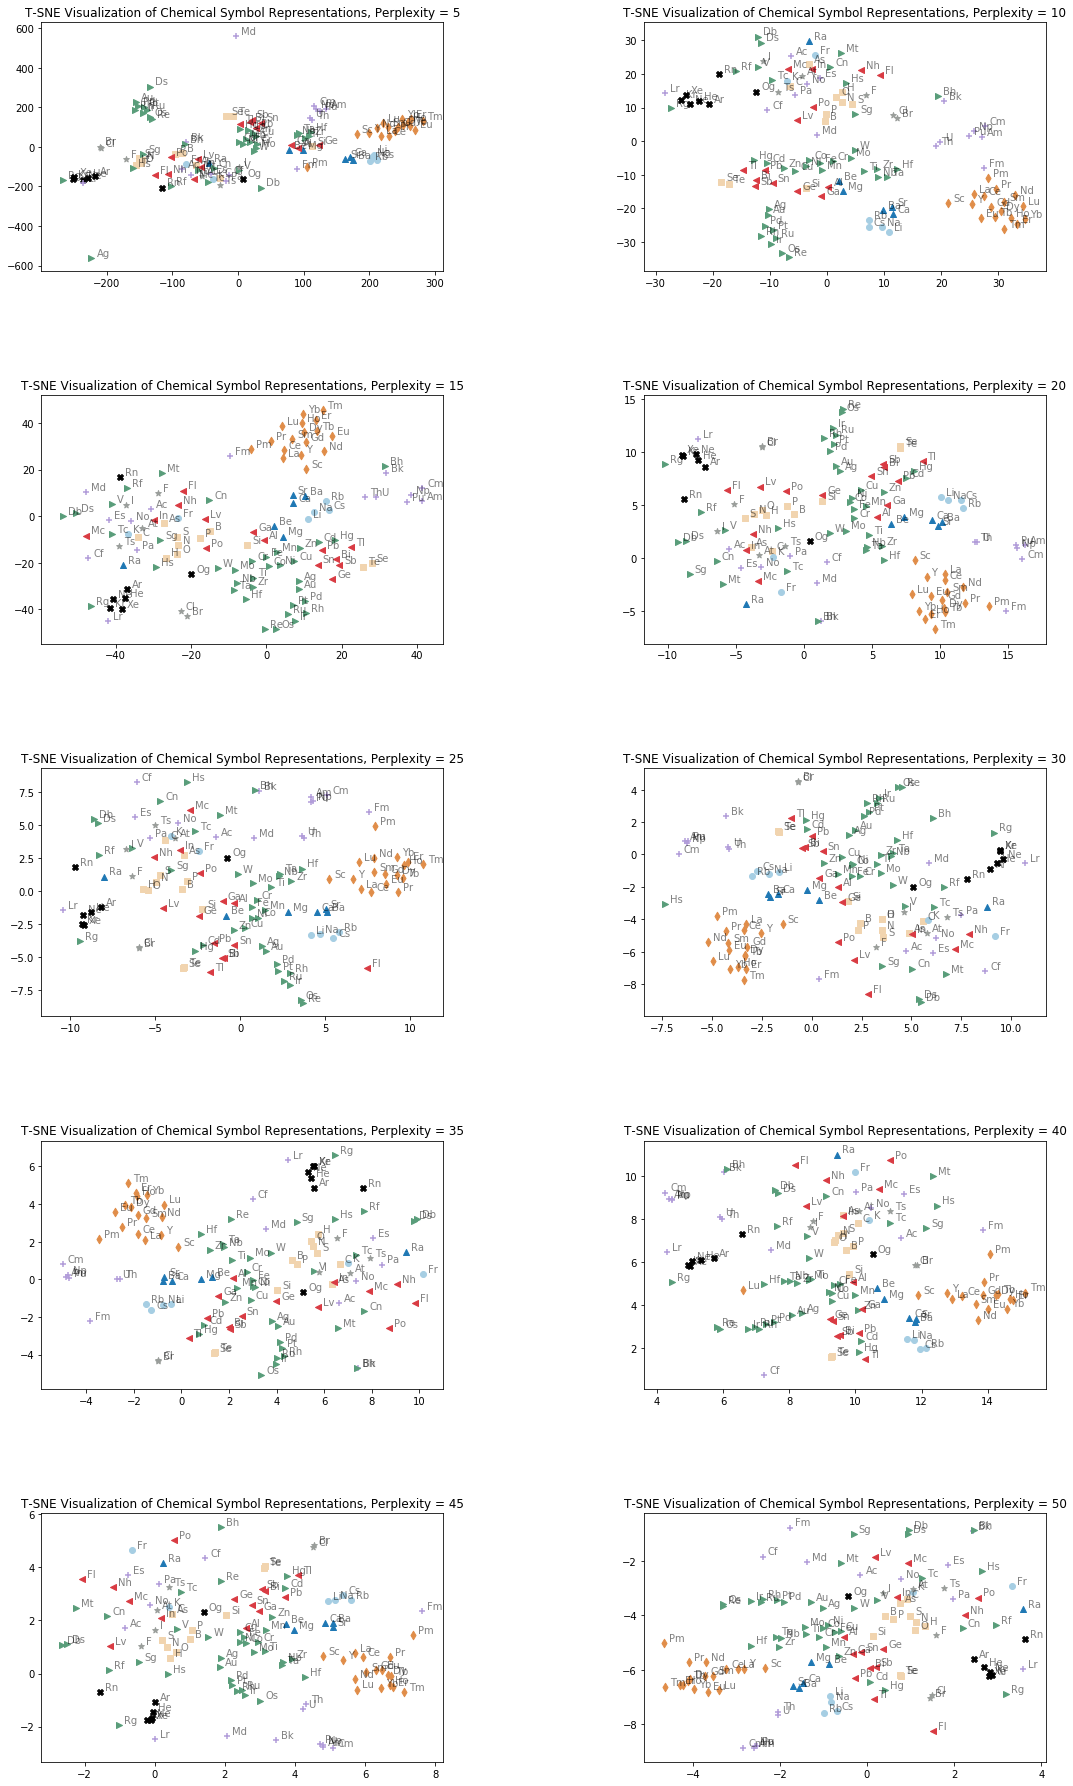

In [10]:
fig, axs = plt.subplots(5,2, figsize=(18, 32))
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(10):
    perplexity = 5*(i+1)
    tsne_model_in_2d = TSNE(perplexity=perplexity, n_components=2, init = 'pca', n_iter=3500, random_state = 32)
    embeddings_in_2d = np.array(tsne_model_in_2d.fit_transform(embeddings))
    for j in range(len(embeddings_in_2d)):
        x = embeddings_in_2d[j][0]
        y = embeddings_in_2d[j][1]
        axs[i].scatter(x, y, color = cmap[color_dict[j+1]], label = color_dict[j+1], marker = markermap[color_dict[j+1]])
        axs[i].annotate(words[j], alpha=0.5, xy = (x,y), xytext = (5,2), textcoords="offset points")
    axs[i].set_title("T-SNE Visualization of Chemical Symbol Representations, Perplexity = {}".format(perplexity))
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

In [11]:
embeddings = np.array(embeddings)
tsne_model_in_2d = TSNE(perplexity=10, n_components=2, init = 'pca', n_iter=3500, random_state = 32)
embeddings_in_2d = np.array(tsne_model_in_2d.fit_transform(embeddings))

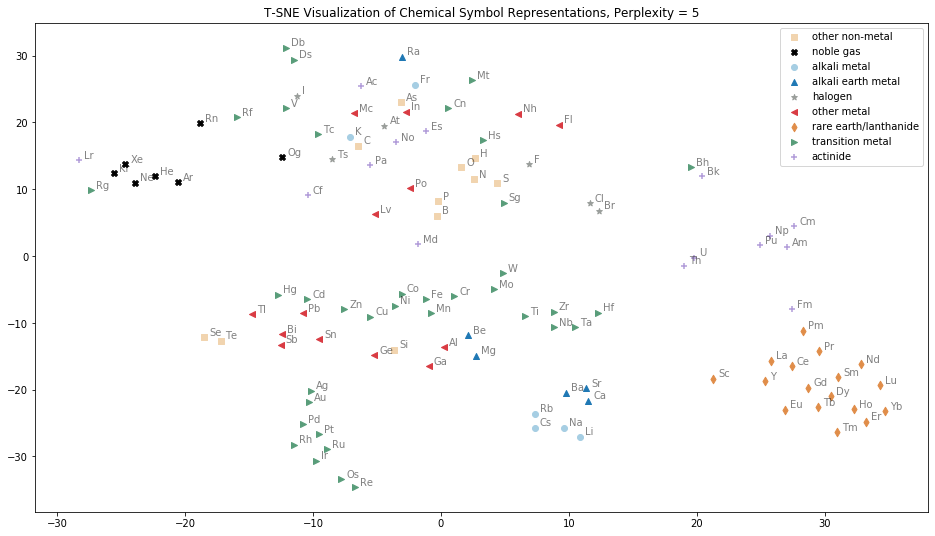

In [12]:
plt.figure(figsize = (16,9))
for i in range(len(embeddings_in_2d)):
    x = embeddings_in_2d[i][0]
    y = embeddings_in_2d[i][1]
    plt.scatter(x, y, color = cmap[color_dict[i+1]], label = color_dict[i+1], marker = markermap[color_dict[i+1]])
    plt.annotate(words[i], alpha=0.5, xy = (x,y), xytext = (5,2), textcoords="offset points")
plt.title("T-SNE Visualization of Chemical Symbol Representations, Perplexity = 5")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

In [13]:
kmeans = KMeans(n_clusters=9, random_state=3)
clusters = kmeans.fit_predict(embeddings_in_2d)

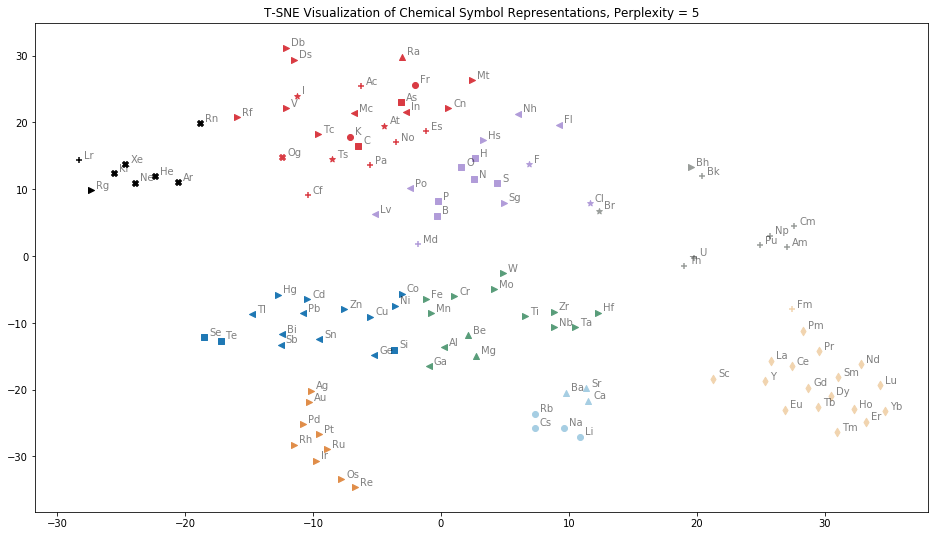

In [14]:
plt.figure(figsize = (16,9))
for i in range(len(embeddings_in_2d)):
    x = embeddings_in_2d[i][0]
    y = embeddings_in_2d[i][1]
    plt.scatter(x, y, color = cmap2[clusters[i]], label = color_dict[i+1], marker = markermap[color_dict[i+1]])
    plt.annotate(words[i], alpha=0.5, xy = (x,y), xytext = (5,2), textcoords="offset points")
plt.title("T-SNE Visualization of Chemical Symbol Representations, Perplexity = 5")
plt.show()